# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [2]:
data = pd.read_csv('Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

<function matplotlib.pyplot.show(*args, **kw)>

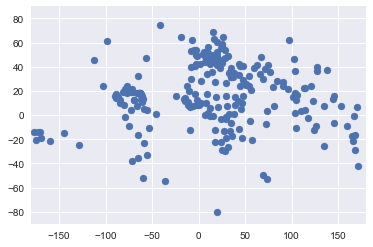

In [3]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [4]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
5,19.953288,60.214887
6,1.560544,42.542291
7,54.300167,23.905282
8,-65.179807,-35.381349
9,44.929933,40.289526


## Clustering

Assume there are only two clusters. 

In [26]:
kmeans = KMeans(20)

In [27]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Clustering Resutls

In [28]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([17,  7, 19, 17, 14,  5, 14, 11,  2, 11,  4, 10,  1, 10, 17,  1, 14,
       11,  3, 14,  9,  9,  7,  5, 11, 13,  6, 14, 17,  5,  6, 17,  2,  2,
       17,  1,  7, 19,  3, 14,  2,  8,  9,  3,  3,  3,  4,  6, 19,  9,  6,
        6, 17,  6, 11, 11, 14, 14, 11, 17, 14, 17,  9,  6, 11, 11, 14,  5,
        3,  5, 15,  2, 14,  0, 12,  3,  0, 11, 14,  9,  9,  9,  9,  3, 14,
       17,  0,  6, 12, 17,  8, 10,  6, 14, 17,  5,  1,  0,  7,  1, 16,  0,
       11, 11,  0, 11, 14,  6, 14, 11,  8,  7,  7,  3,  7,  8, 17, 17,  8,
       14, 11,  8, 11,  9, 14, 17, 14, 16, 19,  5, 14,  5,  8, 17,  9, 14,
        5, 19, 16, 13, 12, 14,  9, 14,  8, 14,  8, 12, 19,  9, 17, 16, 19,
        1, 19, 15,  9, 15,  9,  6,  4, 14,  5,  7, 12, 15, 11,  7,  6, 18,
        6,  1,  1, 12,  5, 17,  8, 14,  2, 11, 18, 11,  5,  7,  3,  9, 11,
        3,  3,  9,  1,  2,  9, 12,  9,  6, 14, 16, 16, 17, 14,  9, 17,  5,
       14,  5, 19, 17, 16, 11, 17,  3,  9,  8,  7,  7,  1,  4, 17, 14, 11,
        8,  3,  3,  5,  2

In [29]:
data_with_clusters = data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,17
1,Afghanistan,66.004734,33.835231,7
2,Angola,17.537368,-12.293361,19
3,Anguilla,-63.064989,18.223959,17
4,Albania,20.049834,41.142450,14
5,Aland,19.953288,60.214887,5
6,Andorra,1.560544,42.542291,14
7,United Arab Emirates,54.300167,23.905282,11
8,Argentina,-65.179807,-35.381349,2
9,Armenia,44.929933,40.289526,11


Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

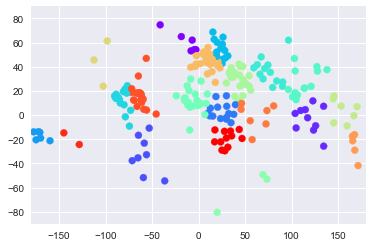

In [32]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!